In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

c:\Users\makan\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
transform = transforms.ToTensor()


In [3]:
train_data = datasets.CIFAR10(root=r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data', train=True, transform= transform, download=True)

100.0%

In [5]:
test_data = datasets.CIFAR10(root=r'C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data', train=False, transform= transform, download=True)


Files already downloaded and verified


In [13]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [14]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: C:\terme 8\Udemy.PyTorch.for.Deep.Learning.with.Python.Bootcamp_p30download.com\13 . trains\pytorch\3. CNN\data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [15]:
torch.manual_seed(101)
trainLoader = DataLoader(train_data, batch_size=10, shuffle=True)
testLoader = DataLoader(test_data, batch_size=10, shuffle=False)


In [16]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [17]:
for images, lables in trainLoader:
    break

In [18]:
lables

tensor([3, 2, 0, 4, 9, 5, 1, 2, 4, 8])

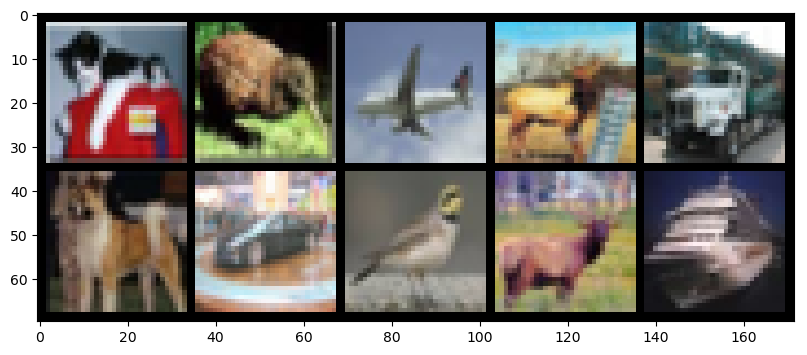

In [26]:
im = make_grid(images, nrow=5)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [27]:
class Convmodel (nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1)
        

In [28]:
torch.manual_seed(101)
model = Convmodel()
model

Convmodel(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [36]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(trainLoader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testLoader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.63619900  accuracy:  26.810%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.43922269  accuracy:  32.430%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.76098657  accuracy:  35.827%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.65936685  accuracy:  38.375%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 2.34729314  accuracy:  40.040%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.14409351  accuracy:  49.650%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.56915593  accuracy:  50.160%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 0.72549033  accuracy:  50.400%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.21260095  accuracy:  50.830%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.66405797  accuracy:  51.328%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 0.76557201  accuracy:  55.380%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.28123069  accuracy:  55.600%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.52944911  accuracy:  55.960%
epoch:  2  b

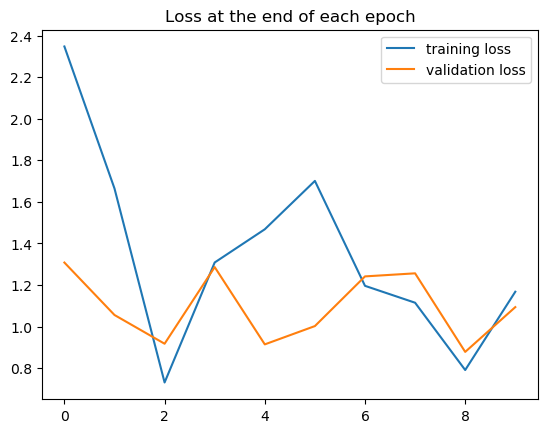

In [37]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

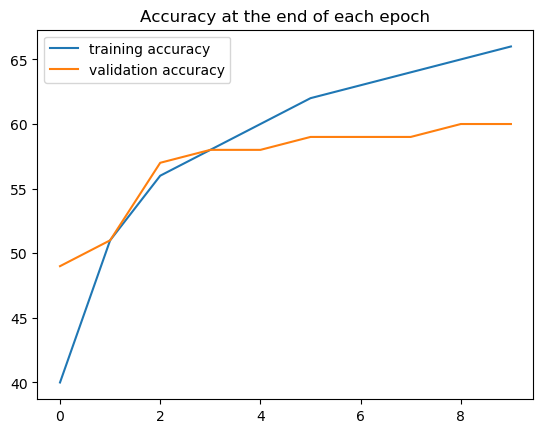

In [38]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();